#### Australia Car Market Machine Learning Project
##### Made by Andres Cardenas (Junior Data Analyst)

In [32]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Let's jump in there calling the database

In [33]:
database = pd.read_csv(r'C:\Users\pipec\OneDrive\AUSTRALIA\Codecademy\ML Australia Car Market Project\cars_info_database.csv')
database.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


1. Finding principal features to describe the data

In [34]:
database.describe()
database.info()
#After running this line it looks like there is no NaN values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [35]:
database.duplicated().sum()
#It looks like there are no duplicate rows in the dataset.

0

### Exploratory Data Analysis

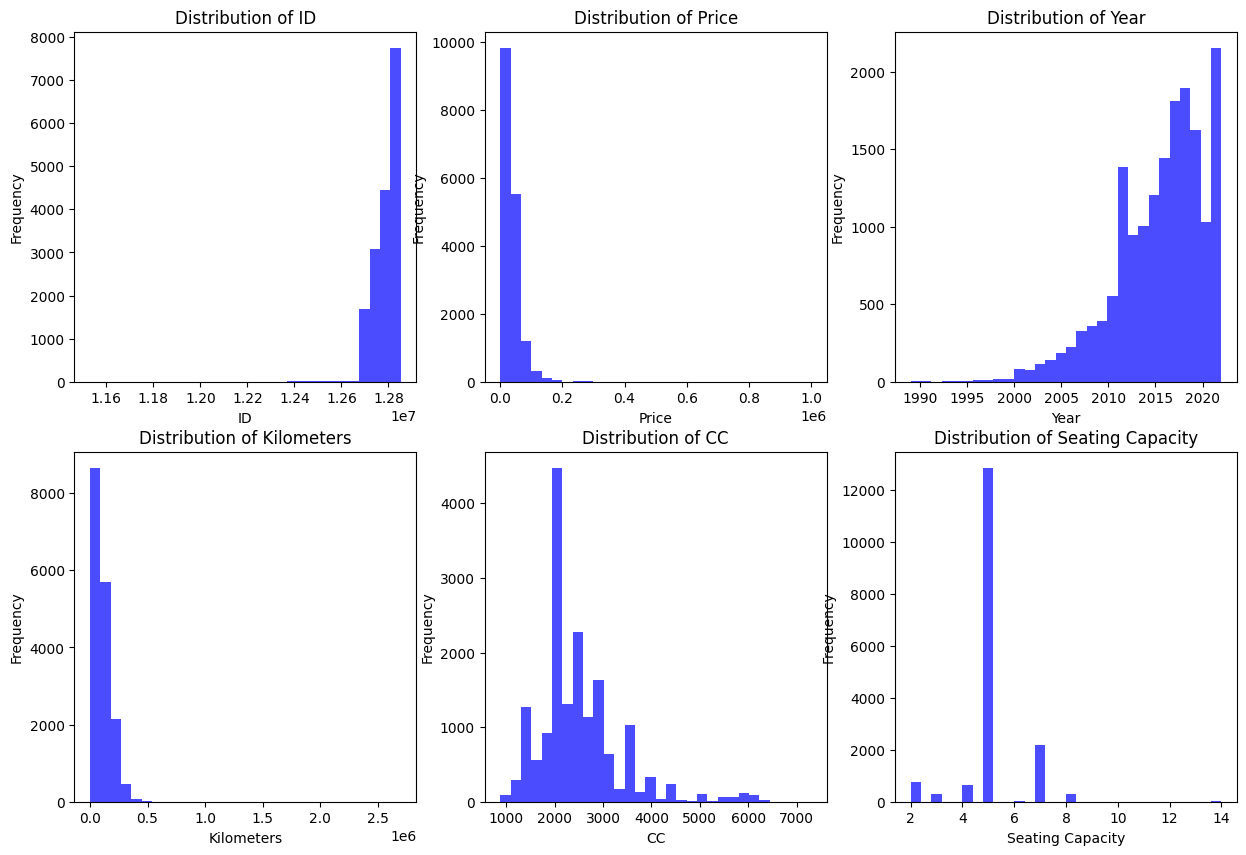

In [36]:

numeric_columns = database.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(
        2, 
        3, 
        figsize=(15,10)
    )
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(database[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.show()

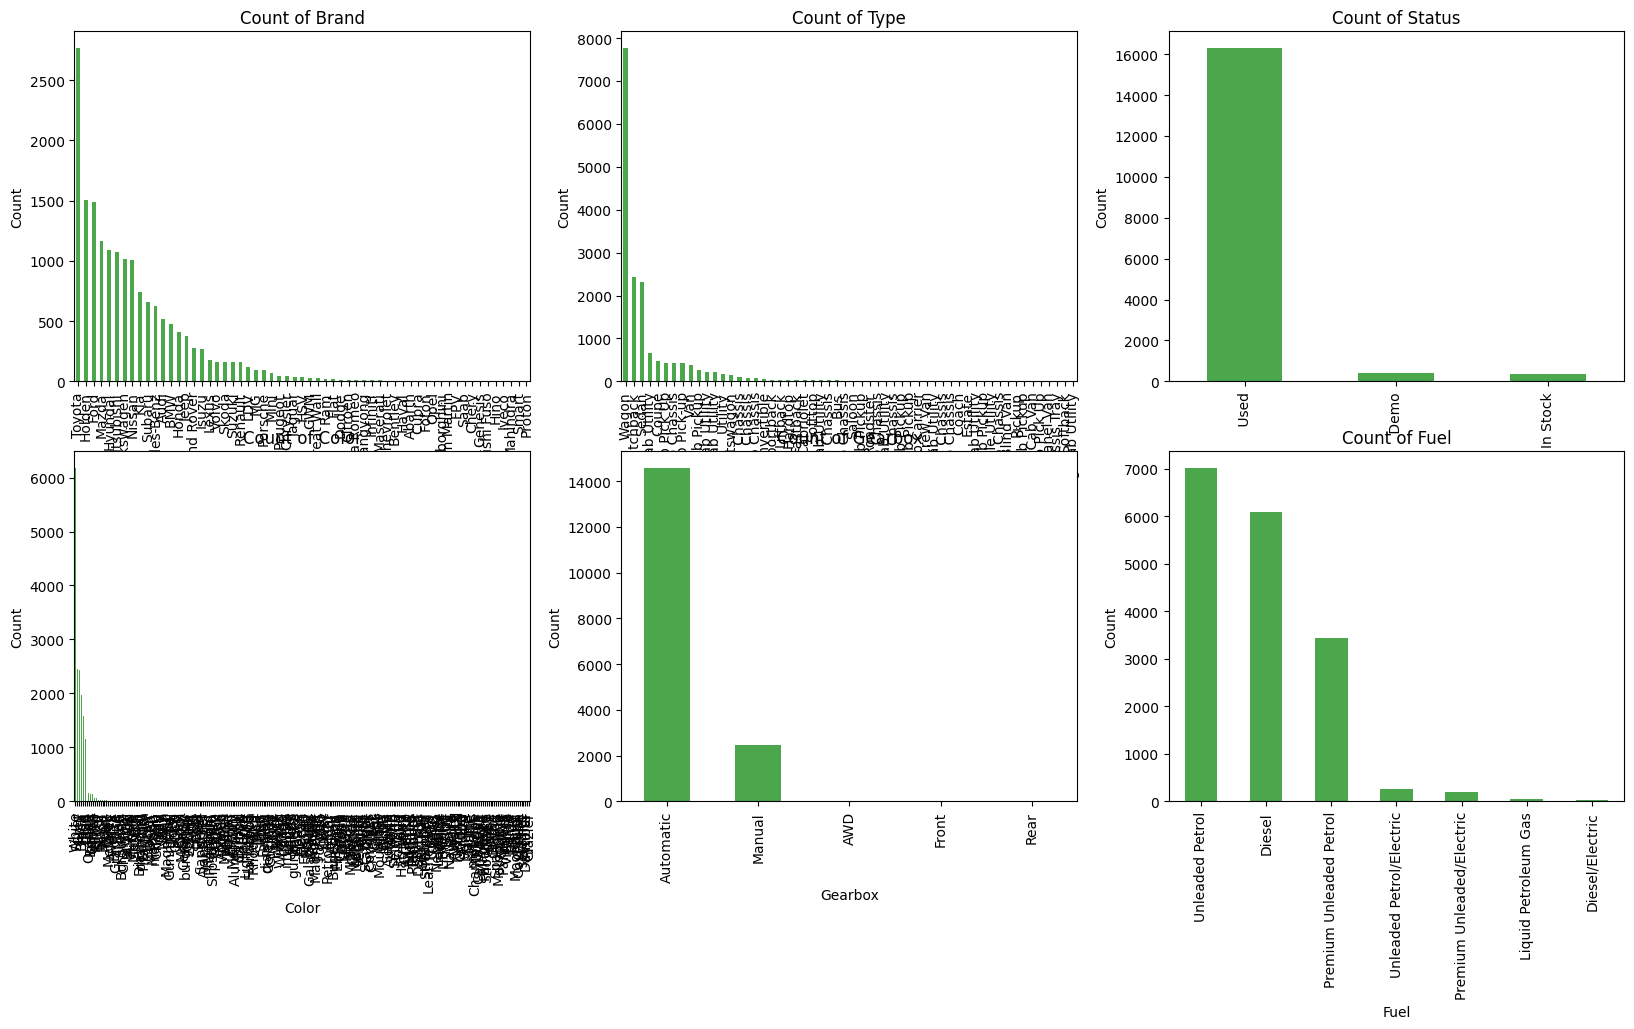

In [37]:
categorical_columns = ['Brand','Type','Status','Color','Gearbox','Fuel']
fig, axes = plt.subplots(
        2, 
        3, 
        figsize=(20,10)
    )
for i, column in enumerate(categorical_columns):
    plt.subplot(2, 3, i + 1)
    database[column].value_counts().plot(kind='bar', color='green', alpha=0.7)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.show()

In [38]:
# Group by 'Brand' and compute mean of 'Price', then sort descending
db = database.groupby('Brand')['Price'].mean().sort_values(ascending=False)
db.head(10)

Brand
Lamborghini     452923.333333
Aston Martin    235120.000000
Bentley         181405.428571
Porsche         153987.835165
Chevrolet       145833.857143
Ram             105055.956522
FPV              91490.000000
Maserati         84859.750000
HSV              74036.162162
Genesis          64888.000000
Name: Price, dtype: float64

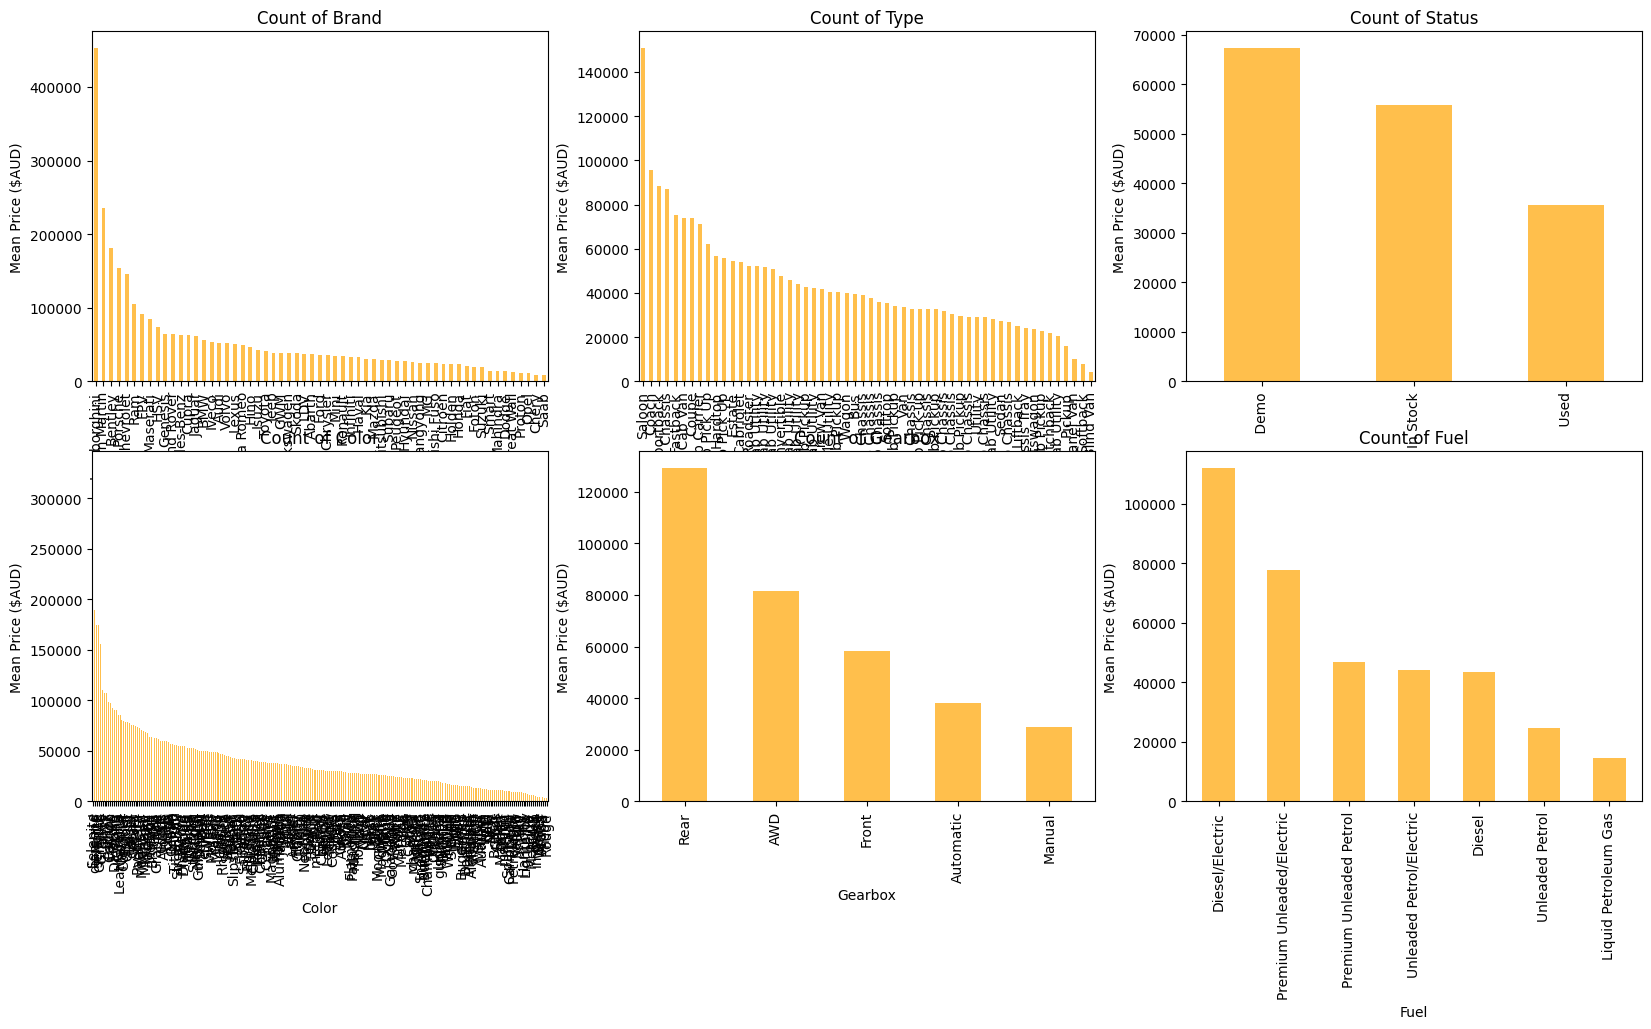

In [39]:
fig, axes = plt.subplots(
        2, 
        3, 
        figsize=(20,10)
    )
for i, column in enumerate(categorical_columns):
    plt.subplot(2, 3, i + 1)
    db = database.groupby(column)['Price'].mean().sort_values(ascending=False)
    db.plot(kind='bar', color='orange', alpha=0.7)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Mean Price ($AUD)')
plt.show()

#### 1. 'ID' column and 'Name' are no longer needed for ML purposes.

#### 2. Histograms above show me the possible outliers in 'Price' and 'Kilometers' I should analyze it further. 

#### 3. Years before 2000 are not reasonable to analyze.

#### 4. We should analyze further the columns 'Color'.

#### 5. Gearbox should be only 'Automatic' or 'Gearbox'.

In [40]:
database.drop(columns=['ID'], inplace=True)
database.drop(columns=['Name'], inplace=True)

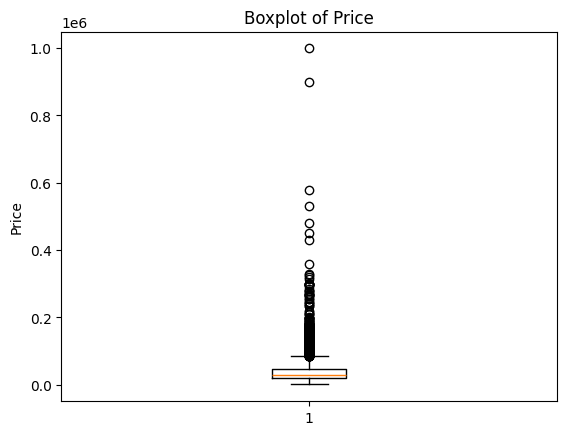

Number of outliers in Price: 805
1        117990
48       119985
54       169990
68       129900
156      110990
          ...  
16916     99800
16974    210800
16988    105000
16989    139888
17025     89990
Name: Price, Length: 805, dtype: int64
               Price         Year     Kilometers           CC  \
count     805.000000   805.000000     805.000000   805.000000   
mean   126952.947826  2019.365217   34131.573913  3531.935404   
std     65466.872693     3.233190   39122.693603  1129.141014   
min     86800.000000  1989.000000       5.000000  1499.000000   
25%     95800.000000  2018.000000    4334.000000  2925.000000   
50%    110000.000000  2020.000000   20647.000000  2999.000000   
75%    130000.000000  2022.000000   50389.000000  4461.000000   
max    999000.000000  2022.000000  275000.000000  6424.000000   

       Seating Capacity  
count        805.000000  
mean           5.183851  
std            1.224130  
min            2.000000  
25%            5.000000  
50%       

In [41]:
plt.boxplot(database['Price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()
#IQR Method TO Detect Outliers in 'Price'
Q1 = database['Price'].quantile(0.25)
Q3 = database['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_price = database[(database['Price'] < lower_bound) | (database['Price'] > upper_bound)]
print(f'Number of outliers in Price: {outliers_price.shape[0]}')
print(outliers_price['Price'])
print(outliers_price.describe())

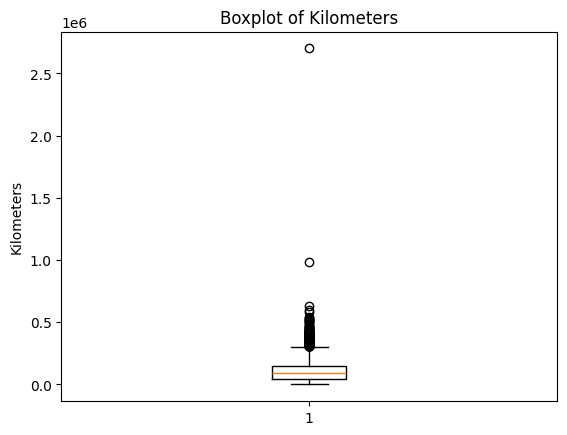

Number of outliers in Kilometers: 278
29       383514
89       323317
147      353850
324      398500
366      312346
          ...  
16726    421160
16793    369811
16799    306921
16865    341548
16973    411023
Name: Kilometers, Length: 278, dtype: int64
              Price         Year    Kilometers           CC  Seating Capacity
count    278.000000   278.000000  2.780000e+02   278.000000        278.000000
mean   14761.866906  2006.974820  3.700209e+05  3108.237410          5.374101
std     9653.275723     4.444939  1.552814e+05   810.648282          1.779439
min     1350.000000  1994.000000  3.056330e+05  1399.000000          2.000000
25%     8000.000000  2004.000000  3.209535e+05  2488.000000          5.000000
50%    12990.000000  2007.000000  3.442200e+05  2982.000000          5.000000
75%    18993.750000  2010.000000  3.791605e+05  3546.500000          7.000000
max    84990.000000  2017.000000  2.700000e+06  7300.000000         11.000000


In [42]:
#Same for 'Kilometers'
plt.boxplot(database['Kilometers'])
plt.title('Boxplot of Kilometers')
plt.ylabel('Kilometers')
plt.show()
#IQR Method TO Detect Outliers in 'Kilometers'
Q1_km = database['Kilometers'].quantile(0.25)
Q3_km = database['Kilometers'].quantile(0.75)
IQR_km = Q3_km - Q1_km
lower_bound_km = Q1_km - 1.5 * IQR_km
upper_bound_km = Q3_km + 1.5 * IQR_km
outliers_km = database[(database['Kilometers'] < lower_bound_km) | (database['Kilometers'] > upper_bound_km)]
print(f'Number of outliers in Kilometers: {outliers_km.shape[0]}')
print(outliers_km['Kilometers'])
print(outliers_km.describe())

In [43]:
#dropping outliers
database = database[database['Price'] <= upper_bound]
database = database[database['Kilometers'] <= upper_bound_km]
database = database[database['Year'] >= 2000]

database.reset_index(drop=True, inplace=True)
database.describe()


,Price,Year,Kilometers,CC,Seating Capacity
count,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000
mean,32679.841523,2015.495664,101778.262473,2426.517972,5.107515
std,18073.016610,4.444072,70020.710280,828.238606,1.100580
min,1000.000000,2000.000000,1.000000,875.000000,2.000000
25%,18500.000000,2013.000000,48000.250000,1984.000000,5.000000
50%,29980.000000,2016.000000,90461.000000,2231.000000,5.000000
75%,43802.250000,2019.000000,148000.000000,2776.000000,5.000000
max,86490.000000,2022.000000,305000.000000,6424.000000,14.000000


In [44]:
#Analyzing 'Color' column
#Cleaning upper and lower spaces
database['Color'] = database['Color'].str.strip()
database['Color'] = database['Color'].str.capitalize()
#Cleaning messy values
database['Color'] = database['Color'].replace({
    'While': 'White',
    'Whte': 'White',
    'Whtie': 'White',
    'Winning': 'White',
    'Winter': 'White',
    'Wr': 'White',
    'Snowflake': 'White',
    'Some' : 'White',
    'Sliver':'Silver',
    'Silber': 'Silver',
    'Onxy': 'Onyx',
    'New' : 'White',
    'Misano': 'Missano',
    'Magnetite':'Magnetic',
    'Lighting' : 'Light',
    'Lightning' : 'Light',
    'Learher': 'Leather', 
    'Leatherette' : 'Leather',
    'Gray': 'Grey',
    'Glazier' : 'Glacier',
    'Charcol' : 'Charcoal',
    'Car' : 'White',
    'British' : 'White',
    'Baige' : 'Beige'})

print(sorted(database['Color'].unique()))



['Alabaster', 'Alpine', 'Alto', 'Aluminium', 'Amber', 'Artic', 'Atomic', 'Aurora', 'Autumn', 'Beige', 'Black', 'Blue', 'Bright', 'Bronze', 'Brown', 'Bugerney', 'Burgundy', 'Candy', 'Caribbean', 'Celestite', 'Ceramic', 'Champagne', 'Charcoal', 'Cherry', 'Cirrus', 'Clear', 'Cloth', 'Conquer', 'Cool', 'Corris', 'Cosmos', 'Coverline', 'Cream', 'Crystal', 'Crème', 'Dark', 'Deep', 'Diamond', 'Dusty', 'Ebony', 'Edge', 'Emerald', 'Estoril', 'Fabric', 'Flamenco', 'Forged', 'Frosted', 'Frozen', 'Fuji', 'Fusion', 'Galapagos', 'Galena', 'Gecko', 'Glacier', 'Gloss', 'Glossy', 'Gold', 'Graphite', 'Green', 'Greg', 'Grey', 'Gun', 'Gunmetal', 'Harmony', 'Heron', 'Horizon', 'Hornet', 'Ice', 'Impulse', 'Iridium', 'Ivory', 'Jatoba', 'Jungle', 'Karma', 'Lava', 'Leather', 'Light', 'Liquid', 'Lunar', 'Machine', 'Magenta', 'Magic', 'Magnetic', 'Marine', 'Maroon', 'Melbourne', 'Mercury', 'Metalic', 'Metallic', 'Meteor', 'Mica', 'Mineral', 'Missano', 'Mojave', 'Moondust', 'Mountain', 'Navarra', 'Navy', 'Nebula'

In [45]:
#Let's run ANOVA test to see if 'Color' has significant effect on 'Price'
import scipy.stats as stats
anovadata = [database[database['Color'] == color]['Price'] for color in database['Color'].unique()]

f_stat, p_value = stats.f_oneway(*anovadata)

print(f'ANOVA F-statistic: {f_stat}, p-value: {p_value}')
#Since p-value is less than 0.05, we reject the null hypothesis (Colors doesn't affect price) and conclude that there are significant differences in mean prices among different car colors.


ANOVA F-statistic: 3.8657694248006234, p-value: 2.5017242743680843e-54


In [46]:
#Dropping trash values in 'Gearbox'

database = database[(database['Gearbox'] == 'Automatic') | (database['Gearbox'] == 'Manual')] 

database['Gearbox'].value_counts()

Gearbox
Automatic    13681
Manual        2217
Name: count, dtype: int64

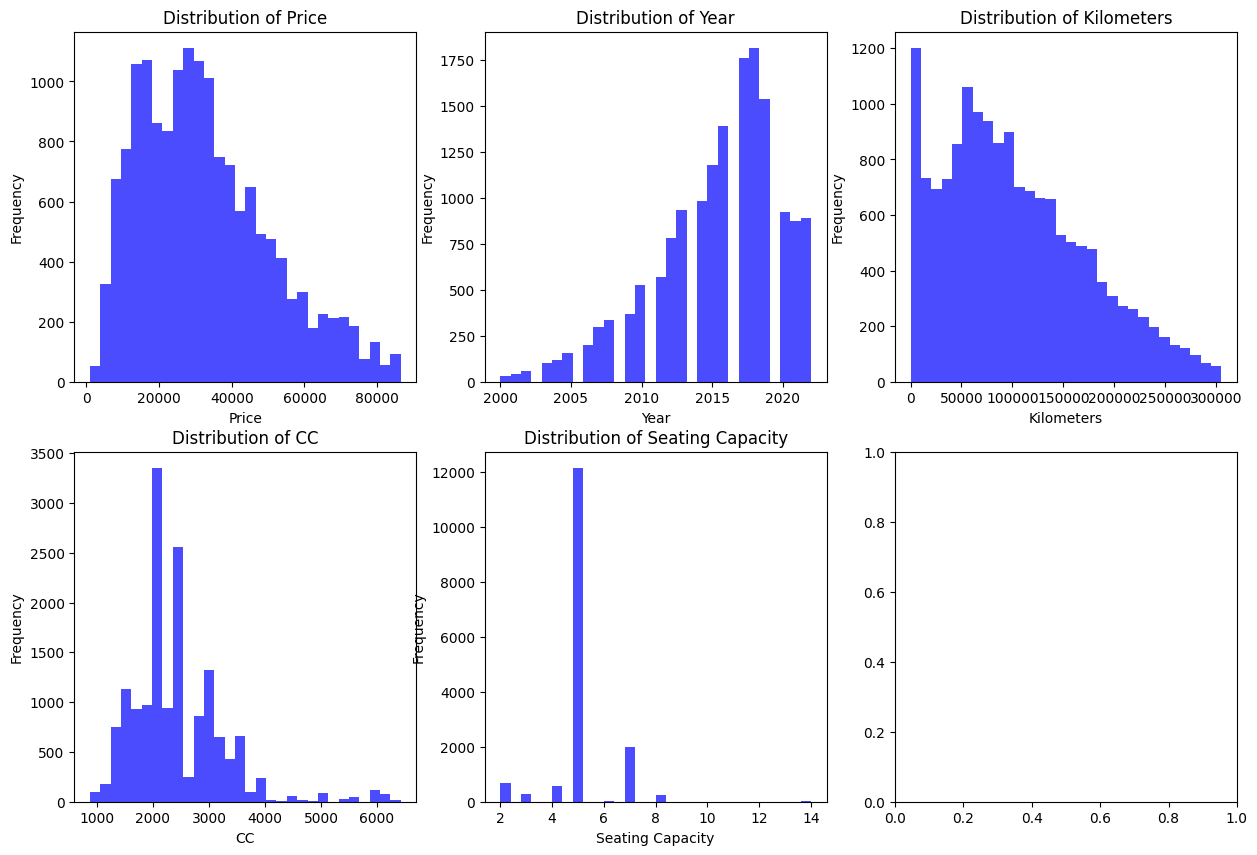

In [47]:
#Let's have a look at the histograms again after removing outliers.

numeric_columns = database.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(
        2, 
        3, 
        figsize=(15,10)
    )
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(database[column].dropna(), bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.show()

### Now Let's breakdown the correlation between variables plotting a heatmap

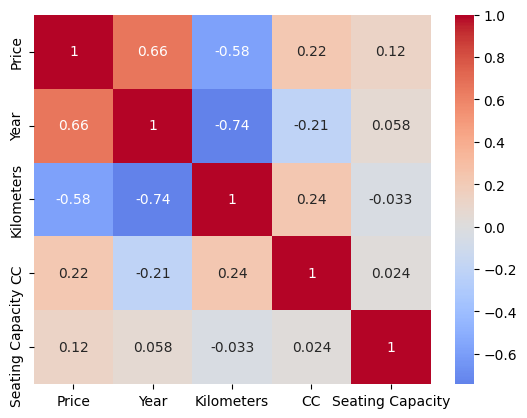

In [48]:
sns.heatmap(database[(numeric_columns)].corr(), annot=True, cmap='coolwarm', center = 0)
plt.show()

In [52]:
database.head()

,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
2,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
3,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5
4,26800,Nissan,X-Trail,ST (4WD),T32 Series 2,2017,121870,Wagon,Automatic,Unleaded Petrol,Used,2488,White,5


In [ ]:
#Cleaning 'Status' column
database['Status'] = database['Status'].str.strip()
#Let's save the database cleaned and processed
database.to_csv('Cleaned_database.csv', index = False)


